In [51]:
from keras.datasets import mnist

In [97]:
import numpy as np

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
import matplotlib.pyplot as plt

In [55]:
x_train.shape

(60000, 28, 28)

In [56]:
x_test.shape

(10000, 28, 28)

In [57]:
single_image = x_train[0]

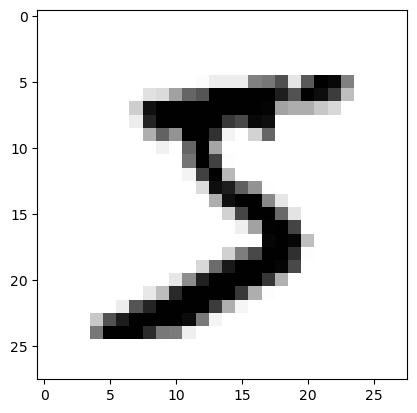

In [58]:
plt.imshow(single_image, cmap = 'gray_r')

In [59]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [60]:
y_train.shape

(60000,)

In [61]:
from keras.utils.np_utils import to_categorical

In [62]:
y_cat_test = to_categorical(y_test, 10)

In [63]:
y_cat_train = to_categorical(y_train, 10)

In [64]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [65]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [66]:
single_image.max()

255

In [67]:
x_train = x_train/x_train.max() #255

In [68]:
x_test = x_test/x_test.max() 

In [69]:
scaled_image = x_train[0]

In [70]:
scaled_image.max()

1.0

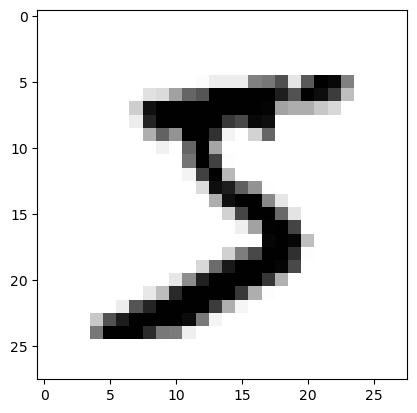

In [94]:
plt.imshow(scaled_image, cmap = 'gray_r')

In [72]:
#Reshape Data
x_train.shape

(60000, 28, 28)

In [73]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [74]:
x_train.shape

(60000, 28, 28, 1)

In [75]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [76]:
x_test.shape

(10000, 28, 28, 1)

In [77]:
from keras.models import Sequential

In [78]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [79]:
model = Sequential()

#Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))

#Pooling Layer
model.add(MaxPool2D(pool_size = (2, 2)))

#2D ---> 1D
model.add(Flatten())

#Dense Layer
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(x_train, y_cat_train, epochs = 2)

Epoch 1/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1323 - accuracy: 0.9598
Epoch 2/2
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9865


In [82]:
model.metrics_names

['loss', 'accuracy']

In [83]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 0s 880us/step - loss: 0.0393 - accuracy: 0.9869


[0.0392615906894207, 0.9868999719619751]

In [84]:
from sklearn.metrics import classification_report

In [85]:
predictions =  model.predict(x_test)

In [98]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [99]:
predicted_labels = np.argmax(predictions, axis=1)

In [100]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

